In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4 as nc

## Figuring out the structure of the dataset

In [2]:
import dask

In [3]:
X_train = []
Y_train = []

simus = ['ssp126',
         'ssp370',
         'ssp585',
         'hist-GHG',
         'hist-aer']
input_path = '/glade/u/home/ianderson/inputs/'
output_path = '/glade/work/duncanwp/ClimateBench/'

for i, simu in enumerate(simus):

    input_name = 'inputs_' + simu + '.nc'
    output_name = 'outputs_' + simu + '.nc'

    # Just load hist data in these cases 'hist-GHG' and 'hist-aer'
    if 'hist' in simu:
        # load inputs 
        input_xr = xr.open_dataset(input_path + input_name)
            
        # load outputs                                                             
        output_xr = xr.open_dataset(output_path + output_name).mean(['month', 'member'])
        output_xr = output_xr.assign({"pr": output_xr.pr * 86400}).rename({'lon':'longitude', 
                                                                               'lat': 'latitude'}).transpose('year','latitude', 'longitude')
    
    # Concatenate with historical data in the case of scenario 'ssp126', 'ssp370' and 'ssp585'
    else:
        # load inputs 
        input_xr = xr.open_mfdataset([input_path + 'inputs_historical.nc', 
                                    input_path + input_name]).compute()
            
        # load outputs                                                             
        output_xr = xr.concat([xr.open_dataset(output_path + 'outputs_historical.nc').mean(['month', 'member']),
                               xr.open_dataset(output_path + output_name).mean(['month', 'member'])],
                               dim='year').compute()
        output_xr = output_xr.assign({"pr": output_xr.pr * 86400}).rename({'lon':'longitude', 
                                                                               'lat': 'latitude'})
        output_xr = output_xr.transpose('year','latitude', 'longitude')

    print(input_xr.dims, simu)


    # Append to list 
    X_train.append(input_xr)
    Y_train.append(output_xr)

Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp126
Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp370
Frozen({'time': 251, 'longitude': 144, 'latitude': 96}) ssp585
Frozen({'time': 165, 'longitude': 144, 'latitude': 96}) hist-GHG
Frozen({'time': 165, 'longitude': 144, 'latitude': 96}) hist-aer


In [4]:
X_train[0]

<xarray.Dataset>
Dimensions:    (time: 251, longitude: 144, latitude: 96)
Coordinates:
  * time       (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Data variables:
    CO2        (time) float64 0.1883 0.3772 0.5738 ... 2.798e+03 2.793e+03
    SO2        (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 3.525e-14
    CH4        (time) float64 0.03131 0.03174 0.03218 ... 0.115 0.1143 0.1136
    BC         (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 4.3e-15

In [5]:
type(X_train[0])

xarray.core.dataset.Dataset

In [6]:
X_train[0].data_vars

Data variables:
    CO2      (time) float64 0.1883 0.3772 0.5738 ... 2.798e+03 2.793e+03
    SO2      (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 3.525e-14
    CH4      (time) float64 0.03131 0.03174 0.03218 ... 0.115 0.1143 0.1136
    BC       (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 4.3e-15

In [7]:
Y_train[0]['latitude']

<xarray.DataArray 'latitude' (latitude: 192)>
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.146597, -21.204188, -20.26178 , -19.319372, -18.376963, -17.434555,
       -16.492147, -15.549738, -14.60733 , -13.664921, -12.722513, -11.780105,
       -10.837696,  -9.895288,  -8.95288 ,  -8.010471,  -7.068063,  -6.125654,
        -5.183246,  -4.240838,  -3.298429,  -2.356021,  -1.413613,  -0.471204,
         0.471204,   1.413613,   2.356021,   3.298429,   4.240838,   5.183246,
         6.125654,   7.068063,   8.010471,   8.95288 ,   9.895288,  10.837696,
        11.780105,  12.722513,  13.664921,  14.60733 ,  15.549738,  16.492147,
        17.434555,  18.376963,  19.319372,  20.26178 ,  21.204188,  22.146597,
        23.089005,  24.031414,  24.973822,  25.91623 ,  26.858639,  27.801047,
        28.743455,  29.685864,  30.628272,  31.570681,  32.513089,  33.455497,
        34.397906,  35.340314,  36.282723,  37.225131,  38.167539,  39.109948,
        40.052356,  40.994764,  41.937173,  42.879581,  43.82199 ,  44.764398,
        45.706806,  46.649215,  47.591623,  48.534031,  49.47644 ,  50.418848,
        51.361257,  52.303665,  53.246073,  54.188482,  55.13089 ,  56.073298,
        57.015707,  57.958115,  58.900524,  59.842932,  60.78534 ,  61.727749,
        62.670157,  63.612565,  64.554974,  65.497382,  66.439791,  67.382199,
        68.324607,  69.267016,  70.209424,  71.151832,  72.094241,  73.036649,
        73.979058,  74.921466,  75.863874,  76.806283,  77.748691,  78.691099,
        79.633508,  80.575916,  81.518325,  82.460733,  83.403141,  84.34555 ,
        85.287958,  86.230366,  87.172775,  88.115183,  89.057592,  90.      ])
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Attributes:
    axis:           Y
    bounds:         lat_bnds
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0

In [8]:
new_lat = Y_train[0]['latitude']
new_lon = Y_train[0]['longitude']

X_train_interp0 = X_train[0].interp(latitude=new_lat, longitude=new_lon, method='linear')
X_train_interp1 = X_train[1].interp(latitude=new_lat, longitude=new_lon, method='linear')
X_train_interp2 = X_train[2].interp(latitude=new_lat, longitude=new_lon, method='linear')
X_train_interp3 = X_train[3].interp(latitude=new_lat, longitude=new_lon, method='linear')
X_train_interp4 = X_train[4].interp(latitude=new_lat, longitude=new_lon, method='linear')

In [9]:
X_train[3]

<xarray.Dataset>
Dimensions:    (time: 165, longitude: 144, latitude: 96)
Coordinates:
  * time       (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Data variables:
    CO2        (time) float64 ...
    CH4        (time) float64 ...
    BC         (time, latitude, longitude) float64 ...
    SO2        (time, latitude, longitude) float64 ...

In [10]:
X_train_interp1

<xarray.Dataset>
Dimensions:    (time: 251, latitude: 192, longitude: 288)
Coordinates:
  * time       (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    CO2        (time) float64 0.1883 0.3772 0.5738 ... 6.684e+03 6.764e+03
    SO2        (time, latitude, longitude) float64 0.0 0.0 0.0 ... 2.114e-13 nan
    CH4        (time) float64 0.03131 0.03174 0.03218 ... 0.7414 0.7455 0.7496
    BC         (time, latitude, longitude) float64 0.0 0.0 0.0 ... 5.89e-15 nan

## Data Normalization

In [11]:
X_train_interpolated = [X_train_interp0, X_train_interp1, X_train_interp2, X_train_interp3, X_train_interp4]

In [12]:
X_train_interpolated

[<xarray.Dataset>
 Dimensions:    (time: 251, latitude: 192, longitude: 288)
 Coordinates:
   * time       (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
   * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
   * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
 Data variables:
     CO2        (time) float64 0.1883 0.3772 0.5738 ... 2.798e+03 2.793e+03
     SO2        (time, latitude, longitude) float64 0.0 0.0 0.0 ... 3.525e-14 nan
     CH4        (time) float64 0.03131 0.03174 0.03218 ... 0.115 0.1143 0.1136
     BC         (time, latitude, longitude) float64 0.0 0.0 0.0 ... 4.3e-15 nan,
 <xarray.Dataset>
 Dimensions:    (time: 251, latitude: 192, longitude: 288)
 Coordinates:
   * time       (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
   * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
   * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
 Data varia

In [13]:
# Utilities for normalizing the input data
def normalize(data, var, meanstd_dict):
    mean = meanstd_dict[var][0]
    std = meanstd_dict[var][1]
    return (data - mean)/std

def unnormalize(data, var, meanstd_dict):
    mean = meanstd_dict[var][0]
    std = meanstd_dict[var][1]
    return data * std + mean

In [14]:
# Compute mean/std of each variable for the whole dataset
meanstd_inputs = {}
len_historical = 165

for var in ['CO2', 'CH4', 'SO2', 'BC']:
    # To not take the historical data into account several time we have to slice the scenario datasets
    # and only keep the historical data once (in the first ssp index 0 in the simus list)
    array = np.concatenate([X_train[i][var].data for i in [0, 3, 4]] + 
                           [X_train[i][var].sel(time=slice(len_historical, None)).data for i in range(1, 3)])
    print((array.mean(), array.std()))
    meanstd_inputs[var] = (array.mean(), array.std())

(1074.172303244536, 1755.690699230666)
(0.1927369743762821, 0.18457590641432994)
(2.5623359997066755e-12, 2.250114566783271e-11)
(1.4947905009818064e-13, 1.0313342554838387e-12)


In [15]:
# normalize input data 
X_train_norm = [] 
for i, train_xr in enumerate(X_train_interpolated): 
    for var in ['CO2', 'CH4', 'SO2', 'BC']: 
        var_dims = train_xr[var].dims
        train_xr=train_xr.assign({var: (var_dims, normalize(train_xr[var].data, var, meanstd_inputs))}) 
    X_train_norm.append(train_xr)

## Reshaping

In [16]:
slider = 10 

# Functions for reshaping the data 
def input_for_training(X_train_xr, skip_historical=False, len_historical=None): 
    
    X_train_np =  X_train_xr.to_array().transpose('time', 'latitude', 'longitude', 'variable').data

    time_length = X_train_np.shape[0]
    # If we skip historical data, the first sequence created has as last element the first scenario data point
    if skip_historical:
        X_train_to_return = np.array([X_train_np[i:i+slider] for i in range(len_historical-slider+1, time_length-slider+1)])
    # Else we just go through the whole dataset historical + scenario (does not matter in the case of 'hist-GHG' and 'hist_aer')
    else:
        X_train_to_return = np.array([X_train_np[i:i+slider] for i in range(0, time_length-slider+1)])
    
    return X_train_to_return 


def output_for_training(Y_train_xr, var, skip_historical=False, len_historical=None): 
    Y_train_np = Y_train_xr[var].data
    
    time_length = Y_train_np.shape[0]
    
    # If we skip historical data, the first sequence created has as target element the first scenario data point
    if skip_historical:
        Y_train_to_return = np.array([[Y_train_np[i+slider-1]] for i in range(len_historical-slider+1, time_length-slider+1)])
    # Else we just go through the whole dataset historical + scenario (does not matter in the case of 'hist-GHG' and 'hist_aer')
    else:
        Y_train_to_return = np.array([[Y_train_np[i+slider-1]] for i in range(0, time_length-slider+1)])
    
    return Y_train_to_return

## CNN

In [17]:
X_train_norm[3]

<xarray.Dataset>
Dimensions:    (time: 165, latitude: 192, longitude: 288)
Coordinates:
  * time       (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    CO2        (time) float64 -0.6117 -0.6116 -0.6115 ... 0.2023 0.2225 0.2428
    CH4        (time) float64 -0.8746 -0.8722 -0.8699 ... 0.9415 0.9591 0.9669
    BC         (time, latitude, longitude) float64 -0.1449 -0.1449 ... nan
    SO2        (time, latitude, longitude) float64 -0.1139 -0.1139 ... nan

In [18]:
var_to_predict =  'tas'
# skip_historical set to (i < 2) because of the order of the scenario and historical runs in the X_train and Y_train lists.
# In details: ssp126 0, ssp370 1 = skip historical part of the data, ssp585 2, hist-GHG 3 and hist-aer 4 = keep the whole sequence
X_train_all = np.concatenate([input_for_training(X_train_norm[i], skip_historical=(i<2), len_historical=len_historical) for i in range(len(simus))], axis = 0)
Y_train_all = np.concatenate([output_for_training(Y_train[i], var_to_predict, skip_historical=(i<2), len_historical=len_historical) for i in range(len(simus))], axis=0)
print(X_train_all.shape)
print(Y_train_all.shape)

(726, 10, 192, 288, 4)
(727, 1, 192, 288)


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Input, Reshape, AveragePooling2D, MaxPooling2D, Conv2DTranspose, TimeDistributed, LSTM, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2

import random 
seed = 6 
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

cnn_model = None

2023-11-20 12:38:33.063121: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 12:38:33.065188: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 12:38:33.103817: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 12:38:33.104598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 12:38:35.167697: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
keras.backend.clear_session()
cnn_model = None

In [21]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(slider, 192, 288, 4)))
cnn_model.add(TimeDistributed(Conv2D(20, (3, 3), padding='same', activation='relu'), input_shape=(slider, 192, 288, 4)))
cnn_model.add(TimeDistributed(AveragePooling2D(2)))
cnn_model.add(TimeDistributed(GlobalAveragePooling2D()))
cnn_model.add(LSTM(25, activation='relu'))
cnn_model.add(Dense(1*192*288))
cnn_model.add(Activation('linear'))
cnn_model.add(Reshape((1, 192, 288)))

2023-11-20 12:38:39.757868: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [22]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 10, 192, 288, 20   740       
 ributed)                    )                                   
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 96, 144, 20)   0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 20)            0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 25)                4600      
                                                                 
 dense (Dense)               (None, 55296)             1437696   
                                                        

In [23]:
cnn_model.compile(optimizer='rmsprop', loss='mse', metrics=['mse']) 

## Training the model

In [24]:
X_train_all.shape, Y_train_all.shape

((726, 10, 192, 288, 4), (727, 1, 192, 288))

In [25]:
# Not a great fix but keeping it for now
test = Y_train_all[1:]

In [26]:
test.shape

(726, 1, 192, 288)

In [27]:
Y_train_all = test 

In [28]:
hist = cnn_model.fit(X_train_all,
                     Y_train_all,
                     use_multiprocessing=True, 
                     #workers=5,
                     batch_size=16,
                     epochs=30,
                     verbose=1)

Epoch 1/30
46/46 [==============================] - 33s 617ms/step - loss: 6.2110 - mse: 6.2110
Epoch 2/30
46/46 [==============================] - 28s 610ms/step - loss: 6.1864 - mse: 6.1864
Epoch 3/30
46/46 [==============================] - 28s 611ms/step - loss: 6.1602 - mse: 6.1602
Epoch 4/30
46/46 [==============================] - 28s 613ms/step - loss: 6.0935 - mse: 6.0935
Epoch 5/30
46/46 [==============================] - 28s 619ms/step - loss: 4.1670 - mse: 4.1670
Epoch 6/30
46/46 [==============================] - 28s 614ms/step - loss: 3.8389 - mse: 3.8389
Epoch 7/30
46/46 [==============================] - 29s 617ms/step - loss: 3.8650 - mse: 3.8650
Epoch 8/30
46/46 [==============================] - 28s 616ms/step - loss: 3.8952 - mse: 3.8952
Epoch 9/30
46/46 [==============================] - 28s 616ms/step - loss: 3.8887 - mse: 3.8887
Epoch 10/30
46/46 [==============================] - 28s 610ms/step - loss: 3.8552 - mse: 3.8552
Epoch 11/30
46/46 [====================

## Testing

In [38]:
# Open and reformat test data 
X_test = xr.open_mfdataset([input_path + 'inputs_historical.nc',
                            input_path + 'inputs_ssp245.nc']).compute()
X_test = X_test.interp(latitude=new_lat, longitude=new_lon, method='linear')

# Normalize data 
for var in ['CO2', 'CH4', 'SO2', 'BC']: 
    var_dims = X_test[var].dims
    X_test = X_test.assign({var: (var_dims, normalize(X_test[var].data, var, meanstd_inputs))}) 
    
X_test_np = input_for_training(X_test, skip_historical=False, len_historical=len_historical)  

In [40]:
# Make predictions using trained model 
m_pred = cnn_model.predict(X_test_np)
# reshape to xarray 
m_pred = m_pred.reshape(m_pred.shape[0], m_pred.shape[2], m_pred.shape[3])
m_pred = xr.DataArray(m_pred, dims=['year', 'latitude', 'longitude'], coords=[X_test.time.data[slider-1:], X_test.latitude.data, X_test.longitude.data])
m_pred = m_pred.transpose('latitude', 'longitude', 'year').sel(year=slice(2015, 2101)).to_dataset(name=var_to_predict)
m_pred

8/8 [==============================] - 3s 317ms/step


<xarray.Dataset>
Dimensions:    (year: 86, latitude: 192, longitude: 288)
Coordinates:
  * year       (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    tas        (latitude, longitude, year) float32 1.775 1.775 ... 3.361 3.361

In [53]:
X_train_norm[0]['latitude']

<xarray.DataArray 'latitude' (latitude: 192)>
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.146597, -21.204188, -20.26178 , -19.319372, -18.376963, -17.434555,
       -16.492147, -15.549738, -14.60733 , -13.664921, -12.722513, -11.780105,
       -10.837696,  -9.895288,  -8.95288 ,  -8.010471,  -7.068063,  -6.125654,
        -5.183246,  -4.240838,  -3.298429,  -2.356021,  -1.413613,  -0.471204,
         0.471204,   1.413613,   2.356021,   3.298429,   4.240838,   5.183246,
         6.125654,   7.068063,   8.010471,   8.95288 ,   9.895288,  10.837696,
        11.780105,  12.722513,  13.664921,  14.60733 ,  15.549738,  16.492147,
        17.434555,  18.376963,  19.319372,  20.26178 ,  21.204188,  22.146597,
        23.089005,  24.031414,  24.973822,  25.91623 ,  26.858639,  27.801047,
        28.743455,  29.685864,  30.628272,  31.570681,  32.513089,  33.455497,
        34.397906,  35.340314,  36.282723,  37.225131,  38.167539,  39.109948,
        40.052356,  40.994764,  41.937173,  42.879581,  43.82199 ,  44.764398,
        45.706806,  46.649215,  47.591623,  48.534031,  49.47644 ,  50.418848,
        51.361257,  52.303665,  53.246073,  54.188482,  55.13089 ,  56.073298,
        57.015707,  57.958115,  58.900524,  59.842932,  60.78534 ,  61.727749,
        62.670157,  63.612565,  64.554974,  65.497382,  66.439791,  67.382199,
        68.324607,  69.267016,  70.209424,  71.151832,  72.094241,  73.036649,
        73.979058,  74.921466,  75.863874,  76.806283,  77.748691,  78.691099,
        79.633508,  80.575916,  81.518325,  82.460733,  83.403141,  84.34555 ,
        85.287958,  86.230366,  87.172775,  88.115183,  89.057592,  90.      ])
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Attributes:
    axis:           Y
    bounds:         lat_bnds
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0

tas


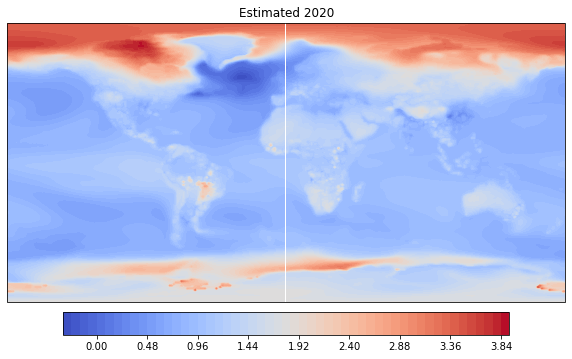

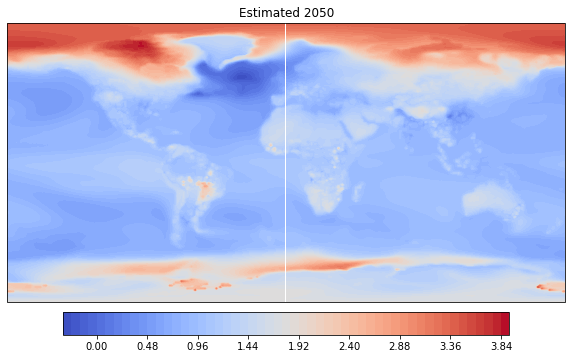

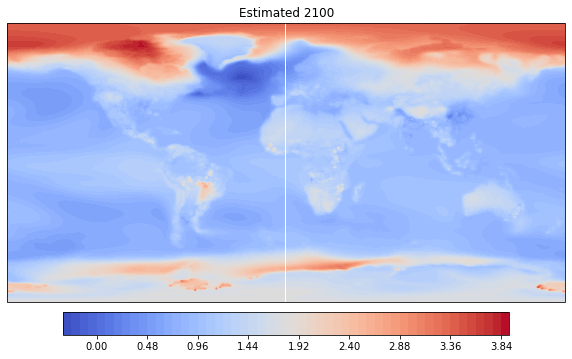

In [63]:
# Plot results 
from matplotlib import colors
from matplotlib import colormaps

# divnorm = colors.TwoSlopeNorm(vmin=-2., vcenter=0., vmax=4.)

lat_vals = X_train_norm[0]['latitude']
lon_vals = X_train_norm[0]['longitude']

print(var_to_predict)
for yr in [2020, 2050, 2100]: 
    f, axes = plt.subplots(1, 1,
                           subplot_kw=dict(projection=ccrs.PlateCarree()),
                           figsize=(10, 10))
    plt.contourf(lon_vals, lat_vals, m_pred[var_to_predict].sel(year=yr), 60, cmap='coolwarm')
    cbar = plt.colorbar(ax=axes, cmap = 'coolwarm', orientation='horizontal', shrink=0.8, pad=0.02)

    # ctr = axes.pcolormesh(m_pred[var_to_predict].sel(year=yr), cmap="coolwarm", norm=divnorm)
    # plt.colorbar(ctr)
    axes.set_title(f"Estimated {yr}")